# Visualização de Dados Financeiros

Na ótica de um economista, dados financeiros consistem em informações numéricas e estatísticas que detalham as transações, ativos, passivos, receitas e despesas de indivíduos, empresas, governos e outras entidades em uma economia específica. Esses dados são cruciais para a análise e compreensão do desempenho financeiro de uma entidade, bem como para embasar decisões econômicas estratégicas.

Os economistas empregam esses dados financeiros para conduzir análises financeiras, avaliar o desempenho econômico, elaborar modelos econômicos, tomar decisões de investimento e desenvolver políticas econômicas fundamentadas. Além disso, esses dados são essenciais para a compreensão das tendências econômicas e financeiras que afetam toda a sociedade. Portanto, os dados financeiros desempenham um papel crítico na tomada de decisões econômicas fundamentais.

Neste experimento, iremos realizar uma análise dos dados financeiros de diversas empresas listadas na Bolsa de Valores do Brasil, a B3. Vamos também comparar esses dados com o [Índice Bovespa (Ibovespa B3)](https://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-amplos/ibovespa.htm) para identificar tendências de valorização das ações. Para isso, utilizaremos uma abordagem que se concentra na análise de séries temporais.

As *séries temporais* são conjuntos de dados que representam observações ou medidas coletadas em intervalos regulares ao longo do tempo. Cada ponto de dados em uma série temporal está associado a um momento específico, tornando-as adequadas para a análise e modelagem de fenômenos que evoluem ao longo de dias, meses, anos ou qualquer outra unidade de tempo definida.

Nossa fonte de consulta será o banco de dados de acesso público mantido pelo [Yahoo Finanças](https://br.financas.yahoo.com), que disponibiliza informações financeiras de empresas de todo o mundo, incluindo dados históricos de preços de ações, relatórios de negociação, notícias e informações financeiras das empresas.

## Importação de Bibliotecas e Criação do Conjunto de Dados (dataset)

Nesta primeira etapa, importaremos as bibliotecas Python comumente utilizadas na análise de dados. Utilizaremos o Pandas para a manipulação dos dados, o NumPy para cálculos matemáticos, o Matplotlib, o Seaborn e o Plotly para visualização, e, por fim, o Datareader para acessar os dados:

- [*Pandas*](https://pandas.pydata.org): Uma ferramenta de código aberto poderosa e flexível para análise e manipulação de dados, construída sobre a linguagem de programação Python.
- [*NumPy*](https://numpy.org): O pacote fundamental para computação científica em Python.
- [*Matplotlib*](https://matplotlib.org): Uma biblioteca abrangente para criar visualizações estáticas, animadas e interativas em Python.
- [*Seaborn*](https://seaborn.pydata.org): Uma biblioteca de visualização de dados em Python baseada no Matplotlib, que oferece uma interface de alto nível para criar gráficos estatísticos atraentes e informativos.
- [*Plotly*](https://plotly.com/python/): Uma biblioteca Python para criação de gráficos interativos de alta qualidade.
- [*Datareader*](https://pydata.github.io/pandas-datareader/stable/index.html): Uma biblioteca Python especializada no acesso e importação de dados financeiros e econômicos de diversas fontes externas, tornando essas informações prontamente disponíveis para análises e manipulações.

In [39]:
# Pandas - Data analysis and manipulation tool.
try:
    import pandas as pd
except ModuleNotFoundError:
    %pip install pandas
finally:
    import pandas as pd

In [40]:
# NumPy - Fundamental package for scientific computing in Python.
try:
    import numpy as np
except ModuleNotFoundError:
    %pip install numpy
finally:
    import numpy as np

In [41]:
# Matplotlib - Comprehensive library for creating static, animated, and interactive visualizations in Python.
try:
    import matplotlib.pyplot as mpl
except ModuleNotFoundError:
    %pip install matplotlib
finally:
    import matplotlib.pyplot as mpl

In [42]:
# Seaborn - Python data visualization library based on matplotlib.
try:
    import seaborn as sns
except ModuleNotFoundError:
    %pip install seaborn
finally:
    import seaborn as sns

In [43]:
# Plotly - Python graphing library makes interactive, publication-quality graphs.
try:
    import plotly.express as px
    import plotly.graph_objects as go
except ModuleNotFoundError:
    %pip install plotly
finally:
    import plotly.express as px
    import plotly.graph_objects as go

In [44]:
# Datareader - Python module that makes it easy to pull historical stock pricing data.
try:
    from pandas_datareader import data as pdr
except ModuleNotFoundError:
    %pip install pandas_datareader
finally:
    from pandas_datareader import data as pdr

In [45]:
try:
    import yfinance as yf
except ModuleNotFoundError:
    %pip install yfinance
finally:
    import yfinance as yf

    yf.pdr_override()

In [46]:
print(f'{pd.__name__} {pd.__version__}')
print(f'{np.__name__} {np.__version__}')

pandas 2.0.3
numpy 1.25.2


In [47]:
# Configure some default plotting settings.
# Allows us to see our plots inside a jupyter notebook.
%matplotlib inline
# Activate seaborn’s “default” theme.
sns.set_theme()

O nosso objetivo é coletar e analisar a variação no preço das ações de algumas empresas negociadas na [B3](https://www.b3.com.br/pt_br/b3/institucional/quem-somos/).

#### Carregando dados do Yahoo Finanças

Carregando os dados da empresa Magazine Luiza S.A. (MGLU3.SA).

In [48]:
# Define the start date.
start_date = '1994-07-01'

In [49]:
# Download the data.
mglu3 = pdr.DataReader('MGLU3.SA', start=start_date)

[*********************100%%**********************]  1 of 1 completed


In [50]:
# Show the information os the dataset.
mglu3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3061 entries, 2011-05-02 to 2023-08-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3061 non-null   float64
 1   High       3061 non-null   float64
 2   Low        3061 non-null   float64
 3   Close      3061 non-null   float64
 4   Adj Close  3061 non-null   float64
 5   Volume     3061 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 167.4 KB


In [51]:
# Describe the dataset.
mglu3.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3061.000000,3061.000000,3061.000000,3061.000000,3061.000000,3.061000e+03
mean,4.675200,4.775012,4.566057,4.666662,4.613381,5.231984e+07
std,6.823524,6.949521,6.682510,6.813013,6.795191,5.298594e+07
min,0.031445,0.031757,0.030390,0.030585,0.029192,0.000000e+00
25%,0.272187,0.278125,0.267187,0.271875,0.249931,1.979200e+07
50%,1.042851,1.093750,1.031250,1.093750,1.049013,3.415040e+07
75%,5.500000,5.600000,5.411875,5.518437,5.356452,6.177600e+07
max,28.150000,28.309999,26.740000,27.450001,27.401571,4.304640e+08


In [52]:
# Show the first 5 rows of the dataset.
mglu3.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-05-02,0.503125,0.518750,0.503125,0.514062,0.463173,280003200
2011-05-03,0.515625,0.521562,0.506250,0.509375,0.458950,33670400
2011-05-04,0.510000,0.515000,0.510000,0.515000,0.464018,39203200
2011-05-05,0.512812,0.512812,0.510000,0.511875,0.461202,35097600
2011-05-06,0.510937,0.511875,0.500000,0.508125,0.457824,38672000


In [53]:
# Show the last 5 rows of the dataset.
mglu3.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-08-18,2.80,3.04,2.76,3.00,3.00,132051900
2023-08-21,3.02,3.07,2.96,3.05,3.05,113692400
2023-08-22,3.08,3.13,3.04,3.04,3.04,96263900
2023-08-23,3.05,3.07,2.98,3.06,3.06,76814100
2023-08-24,3.06,3.06,2.94,3.02,3.02,84054200


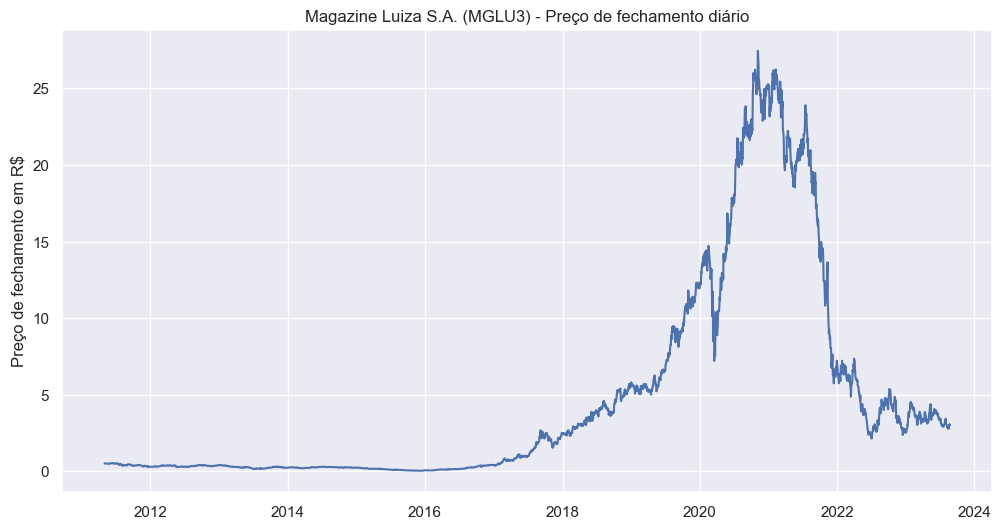

In [54]:
# Show the dataset in seanborn lineplot.
plt = sns.lineplot(data=mglu3, x=mglu3.index, y='Close', markers=True, dashes=False)
# Configure the plot.
plt.figure.set_size_inches(12, 6)
plt.set_title('Magazine Luiza S.A. (MGLU3) - Preço de fechamento diário')
plt.set_ylabel('Preço de fechamento em R$')
plt.set_xlabel('');

O preço de fechamento da ação fornece um indeicativo de valorização da empressa ao longo do tempo, porem um gráfico comumente utilizando pelos analistas de mercado financeiro é o *candlestick*, também conhecidos como gráficos de velas japonesas, que fornece informações sobre o preço de abertura, fechamento, máxima e mínima da ação em um determinado período.

In [55]:
# Show the MGLU3 in candlestick.
candlestick = go.Figure(data=[go.Candlestick(x=mglu3.index,
                                             open=mglu3['Open'],
                                             high=mglu3['High'],
                                             low=mglu3['Low'],
                                             close=mglu3['Close'])])
candlestick.update_layout(title='Magazine Luiza S.A. (MGLU3)',
                          xaxis_title='Data',
                          yaxis_title='Preço em R$')
candlestick.show()

## Carregando dados de uma carteira de ações de forma automática.

Para iniciar a importação automática dos dados da carteira de ações, é necessário primeiro definir as ações das empresas desejadas e inserir os seus nomes em uma lista. Esses nomes podem ser facilmente encontrados no Yahoo Finanças. É importante observar em qual bolsa essas ações são negociadas, uma vez que uma mesma empresa pode ter suas ações listadas em diferentes mercados ao redor do mundo. Neste teste, estamos focando nas ações negociadas na B3, a Bolsa de Valores brasileira.

As empresas selecionadas para esta análise são:
- *Banco Bradesco S.A. (BBDC4.SA)*: Atua no setor bancário, oferecendo uma ampla gama de serviços financeiros, incluindo banco de varejo, serviços bancários corporativos e de investimento.
- *Companhia Siderúrgica Nacional (CSNA3.SA)*: É uma empresa siderúrgica que opera no setor de metalurgia, produzindo aço e produtos relacionados.
- *JHSF Participações S.A. (JHSF3.SA)*: Atua no setor de desenvolvimento imobiliário, com foco em empreendimentos de alto padrão, incluindo shopping centers, hotéis e propriedades comerciais e residenciais.
- *Marfrig Global Foods S.A. (MRFG3.SA)*: É uma empresa do setor de alimentos, especificamente no processamento de carne bovina e outros produtos relacionados, atendendo ao mercado global.
- *SLC Agrícola S.A. (SLCE3.SA)*: Opera no setor agrícola, sendo uma das maiores produtoras de grãos, como soja, milho e algodão, no Brasil.
- *iShares Ibovespa Index Fund (BOVA11.SA)*: Este é um fundo de índice (ETF) que reflete o desempenho do Ibovespa, o principal índice de ações do mercado brasileiro, abrangendo diversas empresas de diferentes setores. O BOVA11 oferece aos investidores exposição ao mercado de ações brasileiro como um todo.

In [56]:
# Definindo as ações que queremos analisar.
stocks = ['BBDC4.SA', 'CSNA3.SA', 'JHSF3.SA', 'MRFG3.SA', 'SLCE3.SA', 'BOVA11.SA']

Definidas as ações que queremos analisar, vamos coletar o preço do fechamento diário usando o Yahoo Finanças.

In [57]:
# Download the data.
carteira = pdr.DataReader(stocks, start=start_date)['Close']

[*********************100%%**********************]  6 of 6 completed


In [58]:
# Show the information os the dataset.
carteira

,BBDC4.SA,BOVA11.SA,CSNA3.SA,JHSF3.SA,MRFG3.SA,SLCE3.SA
Date,,,,,,
2000-01-03,NaN,NaN,4.054166,NaN,NaN,NaN
2000-01-04,NaN,NaN,4.112500,NaN,NaN,NaN
2000-01-05,NaN,NaN,4.333333,NaN,NaN,NaN
2000-01-06,NaN,NaN,4.529166,NaN,NaN,NaN
2000-01-07,NaN,NaN,4.500000,NaN,NaN,NaN
...,...,...,...,...,...,...
2023-08-18,15.19,111.699997,12.220000,4.78,7.35,39.259998
2023-08-21,15.08,110.790001,12.160000,4.83,7.10,39.209999
2023-08-22,15.18,112.410004,12.240000,5.03,6.97,39.680000


In [59]:
# Basic information about the DataFrame.
carteira.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5859 entries, 2000-01-03 to 2023-08-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   BBDC4.SA   3885 non-null   float64
 1   BOVA11.SA  3534 non-null   float64
 2   CSNA3.SA   5859 non-null   float64
 3   JHSF3.SA   4062 non-null   float64
 4   MRFG3.SA   4008 non-null   float64
 5   SLCE3.SA   4018 non-null   float64
dtypes: float64(6)
memory usage: 320.4 KB


In [60]:
# Show columns names.
carteira.columns

Index(['BBDC4.SA', 'BOVA11.SA', 'CSNA3.SA', 'JHSF3.SA', 'MRFG3.SA',
       'SLCE3.SA'],
      dtype='object')

Para facilitar a utilização desses dados, podemos renomear as colunas, fazendo com que fiquem mais intuitivas para quem vai lelas.

In [61]:
# Rename columns names inplace.
carteira.rename(columns={stocks: stocks[:-3] for stocks in stocks}, inplace=True)
carteira.columns

Index(['BBDC4', 'BOVA11', 'CSNA3', 'JHSF3', 'MRFG3', 'SLCE3'], dtype='object')

### Visualizando os dados

Com os dados coletados, uma forma mais interessante de visualizá-los é utilizando gráficos. Para os dados de ações, é possível fazer vários tipos de análises, mas aqui focaremos nas séries temporais para visualizar como as ações se comportam ao longo do tempo.

#### Verificando valores nulos

In [62]:
carteira.isnull().sum()

BBDC4     1974
BOVA11    2325
CSNA3        0
JHSF3     1797
MRFG3     1851
SLCE3     1841
dtype: int64

O somatório apresentado na tabela acima indica a quantidade de valores nulos presentes no conjunto de dados. Como o nosso objetivo é comparar o preço de fechamento das ações, não faz sentido manter os dias em que não houve negociação, portanto, vamos remover esses valores.

In [63]:
# Keep the DataFrame with valid entries in the same variable.
carteira.dropna(inplace=True)

In [64]:
carteira.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3534 entries, 2009-04-17 to 2023-08-24
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BBDC4   3534 non-null   float64
 1   BOVA11  3534 non-null   float64
 2   CSNA3   3534 non-null   float64
 3   JHSF3   3534 non-null   float64
 4   MRFG3   3534 non-null   float64
 5   SLCE3   3534 non-null   float64
dtypes: float64(6)
memory usage: 193.3 KB


In [65]:
# Summary statistics of the Series or Dataframe provided.
carteira.describe()

,BBDC4,BOVA11,CSNA3,JHSF3,MRFG3,SLCE3
count,3534.000000,3534.000000,3534.000000,3534.000000,3534.000000,3534.000000
mean,15.722291,73.450538,15.698588,4.155351,10.432590,15.721033
std,4.818482,23.040300,9.462371,2.196584,5.326997,12.681720
min,8.001417,36.450001,2.740000,1.030000,3.600000,5.165289
25%,11.528239,54.475001,9.022500,2.072500,6.340000,6.951446
50%,14.450788,65.599998,12.665000,3.880000,8.140000,8.460743
75%,18.953058,96.392502,20.896250,5.917500,14.300000,20.524793
max,29.609316,125.750000,51.770000,10.510000,27.700001,52.409088


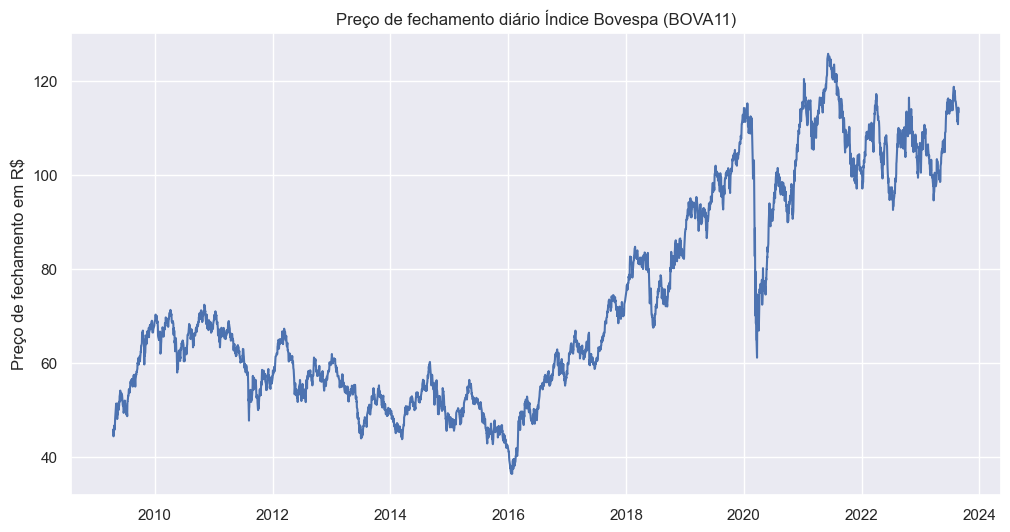

In [66]:
# Visualizando o preço de fechamento diário do Índice Bovespa (BOVA11).
plt = sns.lineplot(data=carteira['BOVA11'], dashes=False)
# Configure the plot.
plt.figure.set_size_inches(12, 6)
plt.set_title('Preço de fechamento diário Índice Bovespa (BOVA11)')
plt.set_ylabel('Preço de fechamento em R$')
plt.set_xlabel('');

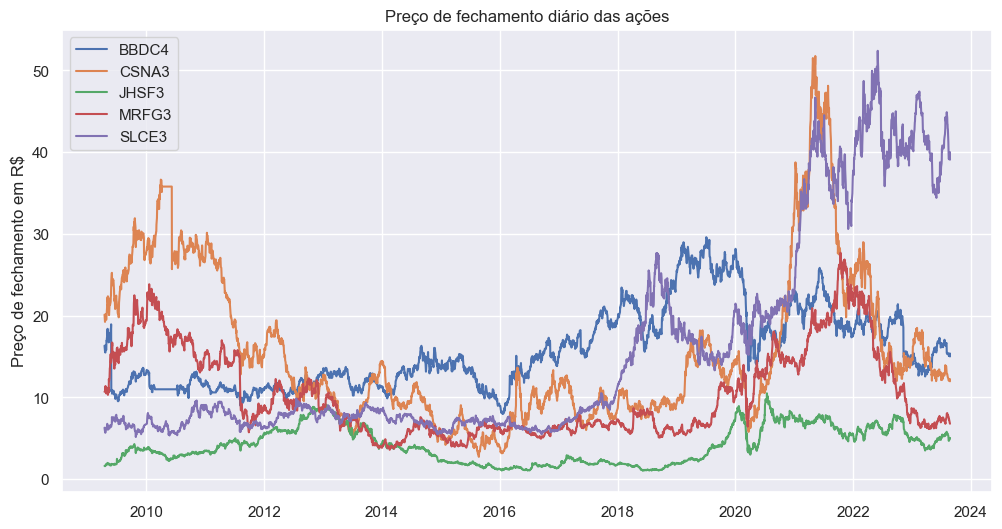

In [67]:
# Visualizando o preço de fechamento diário das ações.
plt = sns.lineplot(data=carteira.loc[:, carteira.columns != 'BOVA11'], dashes=False)
# Configure the plot.
plt.figure.set_size_inches(12, 6)
plt.set_title('Preço de fechamento diário das ações')
plt.set_ylabel('Preço de fechamento em R$')
plt.set_xlabel('');

Com esse gráfico mostrando os preços de fechamento das ações ao longo do tempo permite uma análise rápida de como as ações se comportam, mas não é possível comparar o crescimento de cada uma delas, pois cada uma tem um valor de mercado diferente. Para isso, precisamos realziar a normalização dos dados.

### 2. Normalizando os dados

A normalização de dados é um processo utilizado em análise de dados e estatística para padronizar variáveis em diferentes escalas ou unidades de medida, a fim de torná-las comparáveis e facilitar análises quantitativas. O objetivo da normalização é eliminar distorções que podem surgir devido às diferenças nas unidades de medida, magnitudes ou escalas das variáveis, permitindo que sejam tratadas de maneira justa e equitativa durante a análise.

Para um investidor, o mais interessante não é visualizar qual ação é a mais cara, e sim qual traz mais retorno. Para encontramos o retorno de cada ação precisamos normalizar os dados; para isso dividindo cada um dos valores pelo valor inicial, e assim vemos o crescimento ao longo do tempo.

In [68]:
carteira_normalizada = carteira.copy()

In [69]:
for acao in carteira_normalizada.columns:
    carteira_normalizada[acao] = carteira_normalizada[acao] / carteira_normalizada[acao][0]

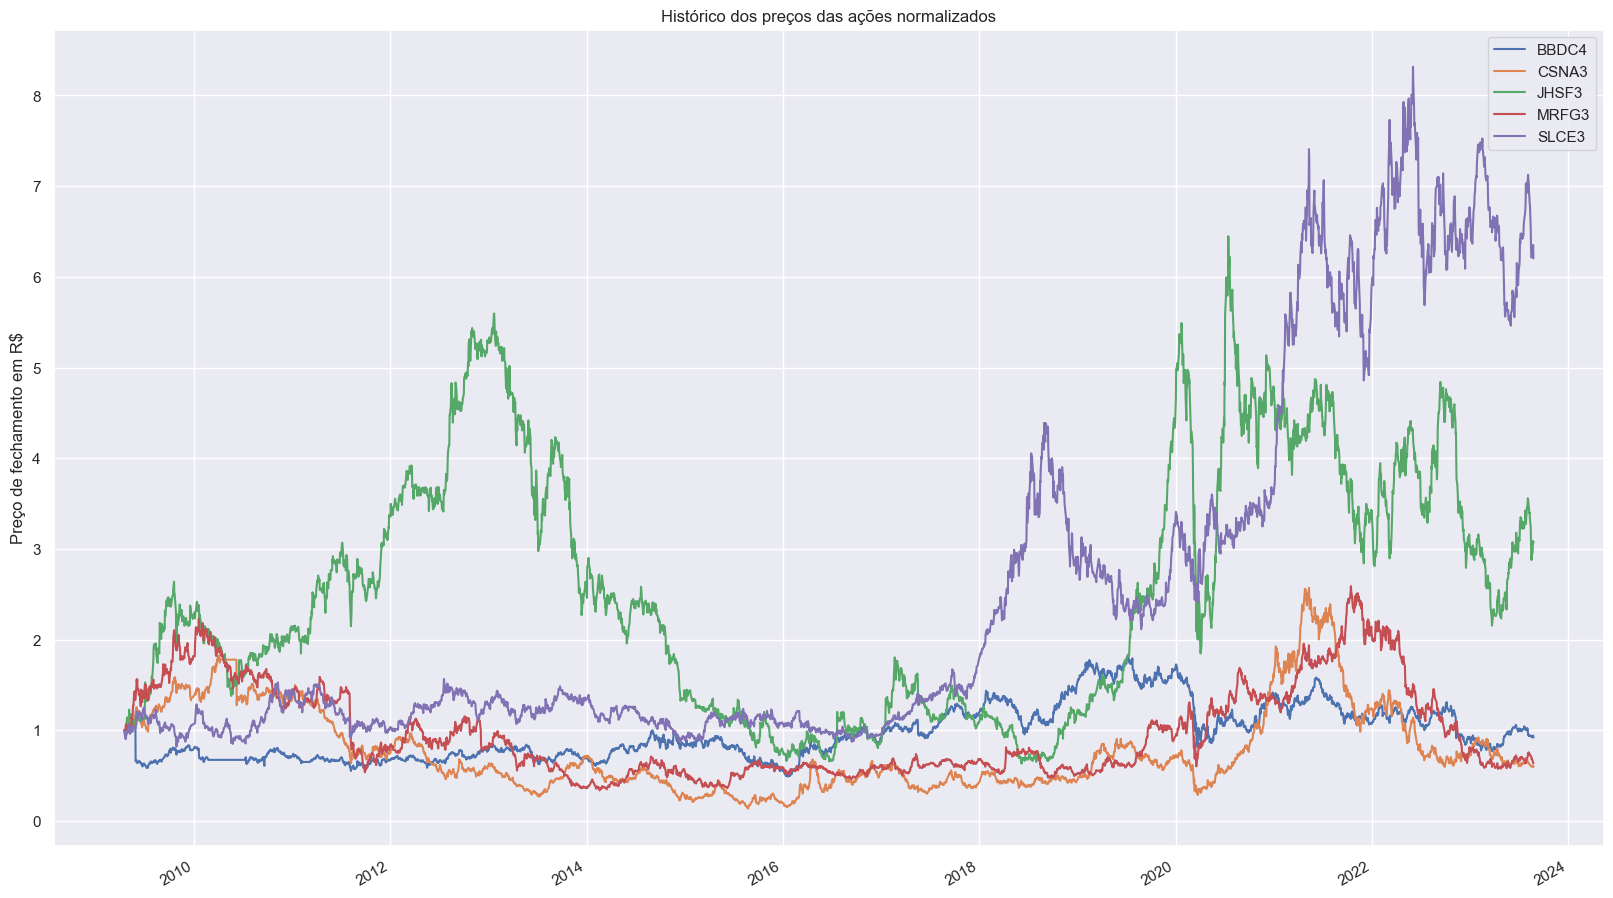

In [70]:
carteira_normalizada.loc[:, carteira_normalizada.columns != 'BOVA11'].plot(figsize=(20, 12),
                                                                           title='Histórico dos preços das ações normalizados',
                                                                           ylabel='Preço de fechamento em R$',
                                                                           xlabel='');

A análise de dados normalizados frequentemente se revela mais fácil e eficaz do que lidar com dados em sua forma bruta e não processada. Quando os dados são normalizados, eles são ajustados para uma escala uniforme, o que facilita a comparação e a identificação de padrões, mesmo em variáveis com unidades de medida diferentes. Além disso, a normalização de dados pode ajudar a reduzir o viés e a distorção que podem surgir devido a diferenças nas unidades de medida, magnitudes ou escalas das variáveis.

### 3. Elevando a visualização dos dados

Embora sejam eficientes ao realizar uma análise rápida, os gráficos utilizados até aqui são estáticos, não permitindo que o utilizador interaja com eles. Uma biblioteca que proporciona uma visualização de dados em gráficos dinâmicos, é o plotly, muito utilizado em dados financeiros.

In [71]:
plot = px.line(title='Histórico do preço das ações')

In [72]:
for acao in carteira_normalizada.columns:
    plot.add_scatter(x=carteira_normalizada.index, y=carteira_normalizada[acao], name=acao)

In [73]:
plot.show()

Um gráfico do tipo histograma é uma representação gráfica que exibe a distribuição de uma variável quantitativa contínua. Ele divide os dados em intervalos chamados "bins" ou "classes" e mostra quantos valores caem em cada intervalo. Cada barra no histograma representa a contagem ou frequência de observações que se enquadram em um intervalo específico.

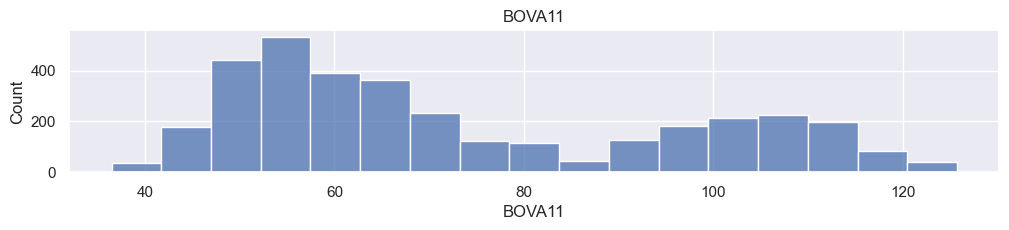

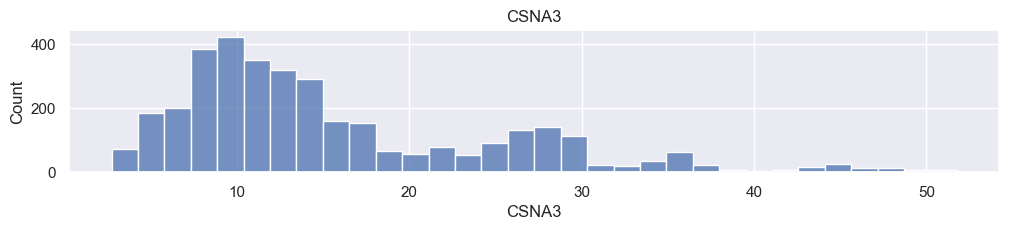

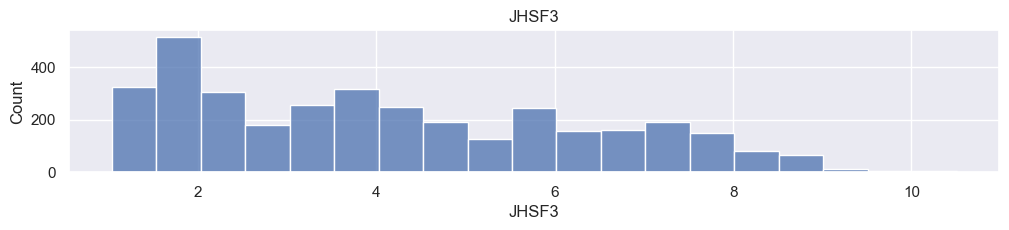

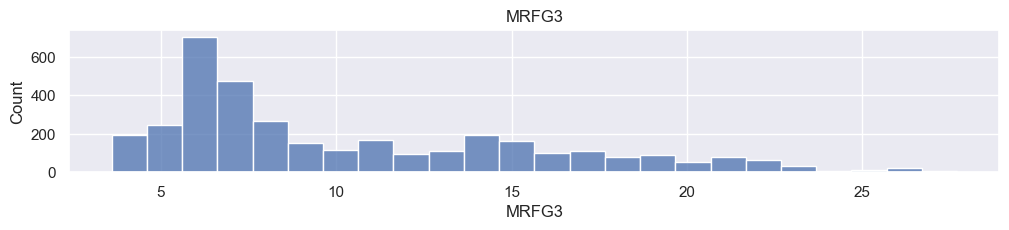

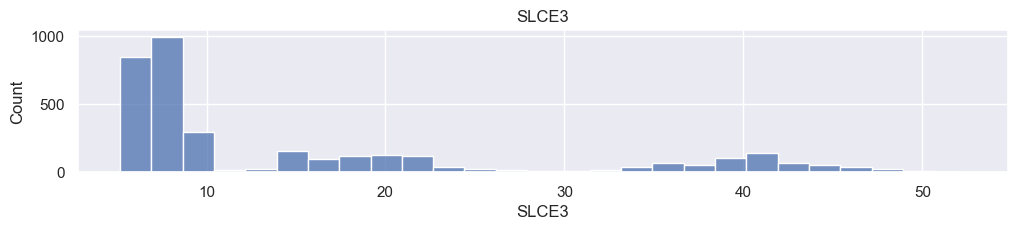

In [74]:
# Histograma
for rg in np.arange(1, len(carteira.columns)):
    mpl.figure(figsize=(12, 24))
    mpl.subplot(11, 1, rg + 1)
    sns.histplot(carteira[carteira.columns[rg]])
    mpl.title(carteira.columns[rg])
    mpl.show()

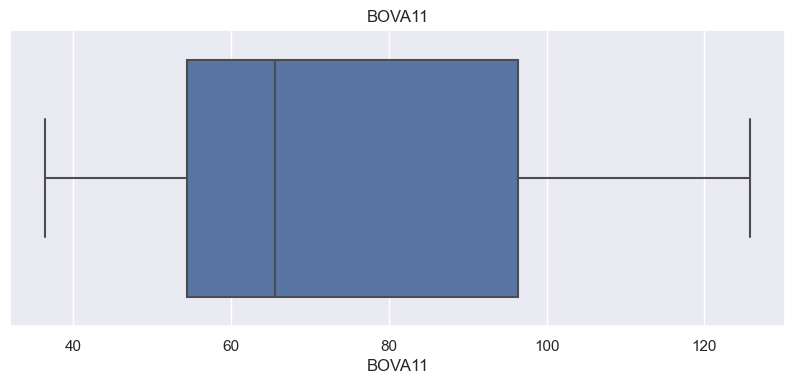

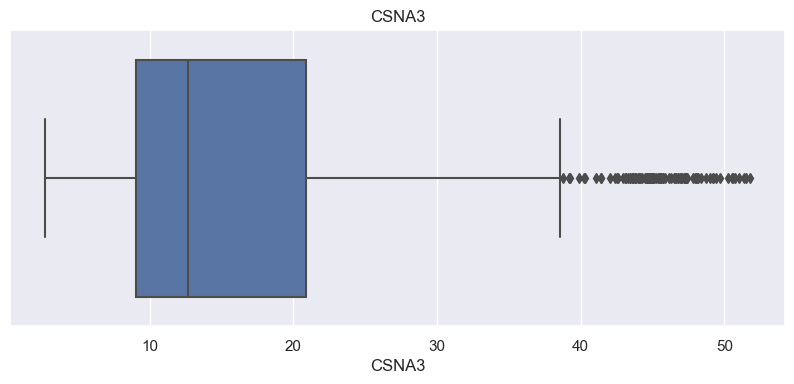

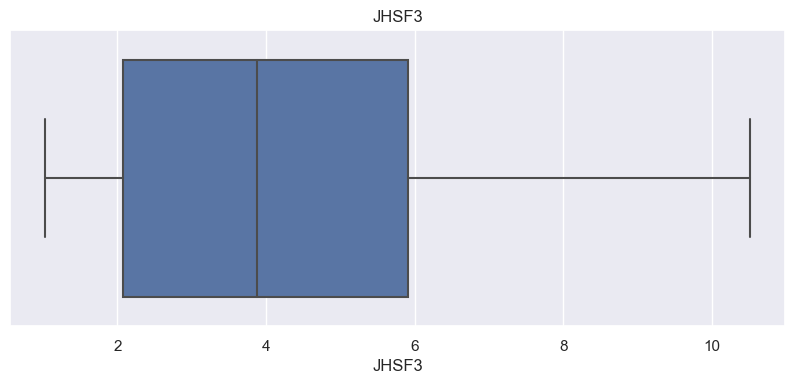

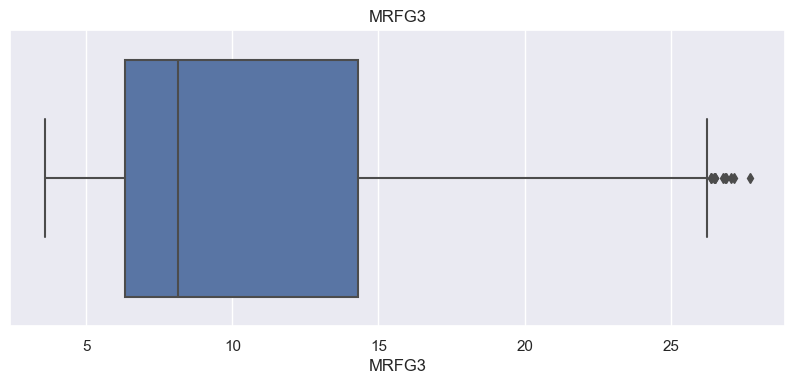

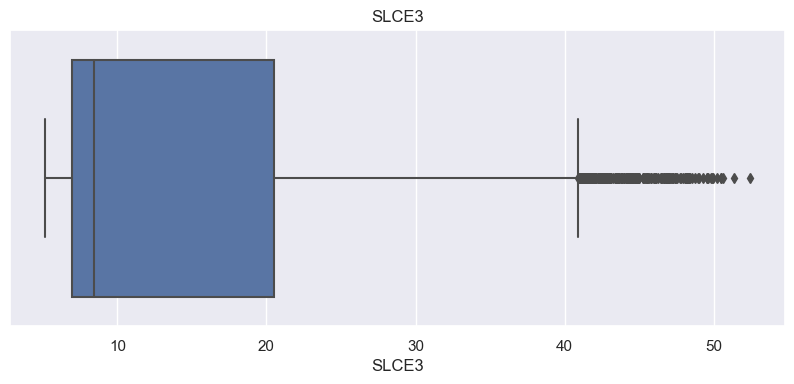

In [75]:
# Boxplot
for rg in np.arange(1, len(carteira.columns)):
    mpl.figure(figsize=(10, 50))
    mpl.subplot(11, 1, rg + 1)
    sns.boxplot(x=carteira[carteira.columns[rg]])
    mpl.title(carteira.columns[rg])
    mpl.show()

Em estatística, a correlação refere-se a uma medida estatística que descreve o grau de relacionamento ou associação entre duas ou mais variáveis. Ela é usada para determinar se existe uma relação estatisticamente significativa entre as variáveis e, se houver, qual é a direção e a força dessa relação.

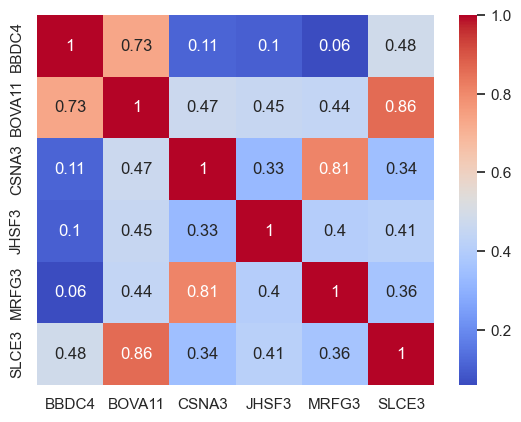

In [76]:
# Heatmap
sns.heatmap(carteira.corr(), annot=True, cmap='coolwarm');